In [1]:
from CortexNet import *

In [2]:
import random
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [3]:
def plot_digit(digit):
    plt.imshow(digit, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("on")

In [46]:
def embed_in_zeros(mat, i, j, size):
    rows = mat.shape[0]
    cols = mat.shape[1]
    if j > 0:
        mat = np.concatenate((np.zeros((rows, j)), mat), axis=1)
    if j+cols < size:
        mat = np.concatenate((mat, np.zeros((rows, size-(j+cols)))), axis=1)
    # return mat
    if i > 0:
        mat = np.concatenate((np.zeros((i, size)), mat), axis=0)
    if i+rows < size:
        mat = np.concatenate((mat, np.zeros((size-(i+rows), size))), axis=0)
    return mat

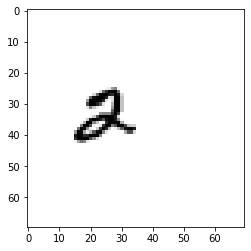

In [5]:
# Demo
# Coords between 0 and 42
x = 20
y = 10

digit = mnist["data"][5].reshape(28, 28)
super_digit = embed_in_zeros(digit, x, y, 70)
plot_digit(super_digit)

In [6]:
nn = NeuralNet()
canvas_size = 32

for i in range(1, canvas_size**2 + 1):
    nn.add_neuron(is_input=True)
for j in range(30):
    nn.add_neuron()
    
for i in range(1, canvas_size**2 + 1):
    for j in range(canvas_size**2 + 1, canvas_size**2 + 30):
        nn.connect_neurons(i, j)
        nn.connect_neurons(j, i)

In [7]:
def train_on_digit(digit, canvas_size=32, iterations=50, max_vel=3):
    x = random.randint(0, canvas_size - 28)
    y = random.randint(0, canvas_size - 28)
    x_vel = random.randint(-1 * max_vel, max_vel)
    y_vel = random.randint(-1 * max_vel, max_vel)
    for k in range(iterations):
        if max(x + x_vel, y + y_vel) + 28 < canvas_size and min(x + x_vel, y + y_vel) >= 0:
            x += x_vel
            y += y_vel
            net_input = embed_in_zeros(digit, x, y, canvas_size).flatten().tolist()
            nn.feed_inputs(net_input)
            nn.run(2)
        else:
            x_vel = random.randint(-3, 3)
            y_vel = random.randint(-3, 3)

In [13]:
count = 0
while True:
    digit_index = np.random.randint(0, len(mnist["data"]))
    if mnist["target"][digit_index] != 4:
        continue
    else:
        count += 1
    digit = mnist["data"][digit_index].reshape(28, 28)
    train_on_digit(digit)
    if count == 10:
        break

KeyboardInterrupt: 

In [52]:
nn.neurons[1027].__dict__['firing']

1.0

In [48]:
digit = mnist["data"][9].reshape(28, 28)
net_input = embed_in_zeros(digit, 0, 0, 32).flatten().tolist()

In [57]:
nn.feed_inputs(net_input)
#nn.iterate()

In [60]:
for j in range(1, 20):
    neuron = nn.neurons[j]
    neuron.compute_firing()
    print(neuron.firing)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
